In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython 
from scipy.signal import lfilter, freqz
from scipy import signal

In [7]:
### TASK 4.1

# read input signal
inputSignal, frequency = sf.read('../audio/xnaume01.wav')
basicSignal = inputSignal
# get number of samples
numberOfSamples = len(inputSignal)
# get duration of input signal
durationOfInputSignal = numberOfSamples/frequency
# time array will be used to display input signal
time = np.arange(numberOfSamples)/frequency
# get maximum 
maximum = max(inputSignal)
# get minimum
minimum = min(inputSignal)
print("Number of samples: " + str(numberOfSamples))
print("Frequency: " + str(frequency))
print("Duration: " + str(durationOfInputSignal))
print("Max value: " + str(maximum) + " at " + str(time[np.where(inputSignal == maximum)]))
print("Min value: " + str(minimum) + " at " + str(time[np.where(inputSignal == minimum)]))

Number of samples: 38605
Frequency: 16000
Duration: 2.4128125
Max value: 0.141510009765625 at [0.287]
Min value: -0.13409423828125 at [0.315375]


<IPython.core.display.Javascript object>


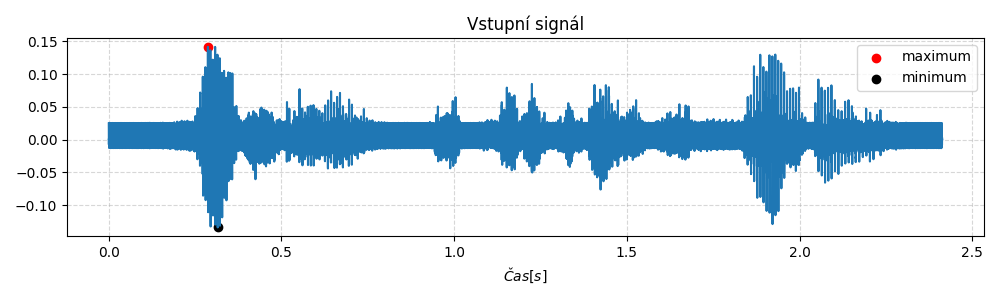

In [8]:
# display input signal
plt.figure(figsize=(10,3))
plt.plot(time, inputSignal)
plt.scatter(time[np.where(inputSignal == maximum)], maximum, marker= 'o', color = 'red', label = 'maximum')
plt.scatter(time[np.where(inputSignal == minimum)], minimum, marker= 'o', color = 'black', label = 'minimum')
plt.gca().set_xlabel('$Čas[s]$')
plt.gca().set_title('Vstupní signál')

plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper right')

plt.tight_layout()

In [9]:
### TASK 4.2

# signal averaging
inputSignal -= np.mean(inputSignal)
# signal normalizationabs
inputSignal /= np.abs(inputSignal).max()
# signal distribution on the frames
fromMarker = 0
toMarker = 1024
matrixOfFrames = np.zeros(shape=(1024,numberOfSamples//512-1 if numberOfSamples//512%2 == 1 else numberOfSamples//512))
counter = 0
while(toMarker < numberOfSamples):
    counter2 = 0
    for i in range(fromMarker, toMarker):
        matrixOfFrames[counter2][counter] = inputSignal[i]
        counter2+=1
    fromMarker += 512
    toMarker += 512
    counter+=1


<IPython.core.display.Javascript object>


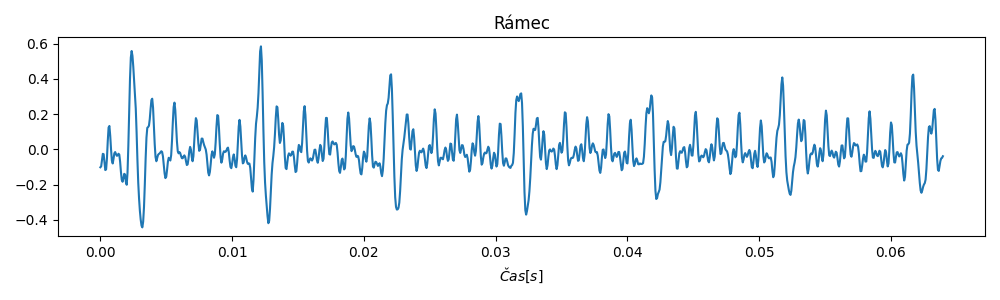

In [10]:
# ramec number 65 was chosen because it is periodic and sonorous
theBestFrame = matrixOfFrames[:,65]
# display frame
time = np.arange(theBestFrame.size)/frequency
plt.figure(figsize=(10,3))
plt.plot(time, theBestFrame)

plt.gca().set_xlabel('$Čas[s]$')
plt.gca().set_title('Rámec')

plt.tight_layout()

<IPython.core.display.Javascript object>


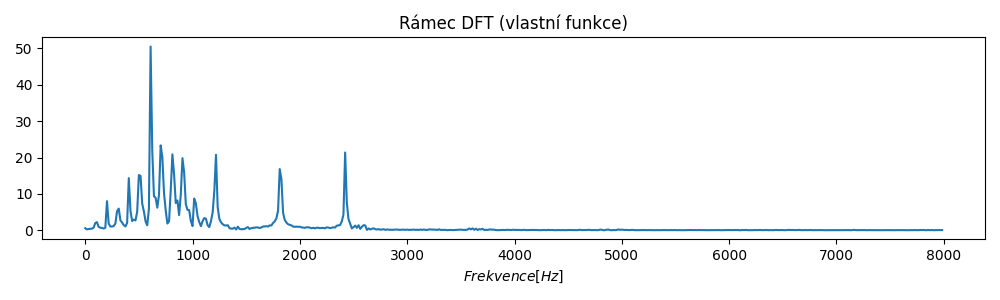

In [11]:
### TASK 4.3

# DFT implementation

def handMadeDFT(dftNumberOfSamples, signalToProcess):
    # count omega 
    w = np.exp((-2j * np.pi) / dftNumberOfSamples)
    # get powers from 0 to dftNumberOfSamples
    power = np.arange(dftNumberOfSamples)
    # create DFT transformation matrix 
    # increasing parameter is order of the powers of the columns,
    # is True to increase powers from left to right
    dftTransformationMatrix = np.vander(w ** power, increasing=True)
    # multiply DFT trasformation by signal vector and return the result
    return dftTransformationMatrix.dot(signalToProcess)

# number of DFT samples
dftNumberOfSamples = 1024

theBestFrameDFT = handMadeDFT(dftNumberOfSamples, theBestFrame)

# display frame DFT, use half of samples because it's symmetrical
x = np.arange(0, frequency/2, frequency/2/512)
y = np.abs(theBestFrameDFT[0:512])

plt.figure(figsize=(10,3))
plt.plot(x, y)

plt.gca().set_xlabel('$Frekvence[Hz]$')
plt.gca().set_title('Rámec DFT (vlastní funkce)')

plt.tight_layout()


<IPython.core.display.Javascript object>


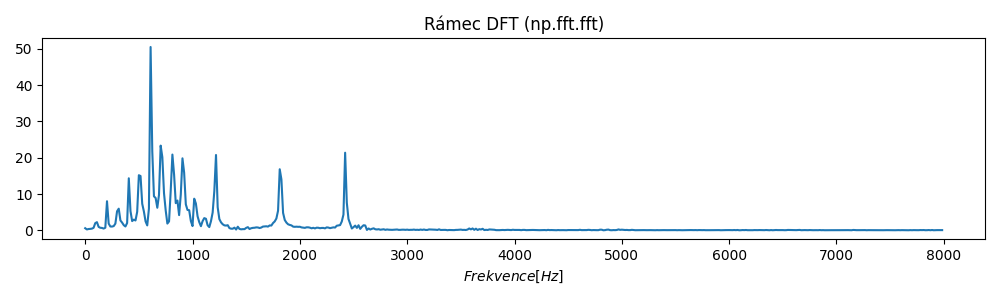

In [12]:
dftFrameBuiltIn = np.fft.fft(theBestFrame)
x = np.arange(0, frequency/2, frequency/2/512)
y = np.abs(dftFrameBuiltIn[0:512])

plt.figure(figsize=(10,3))
plt.plot(x, y)

plt.gca().set_xlabel('$Frekvence[Hz]$')
plt.gca().set_title('Rámec DFT (np.fft.fft)')

plt.tight_layout()


In [13]:
print("DFT of handmade function and built-in function are the same!" if np.allclose(theBestFrameDFT, dftFrameBuiltIn) else "DFT of hadmade function and built-in function are not the same!")

DFT of handmade function and built-in function are the same!


<IPython.core.display.Javascript object>


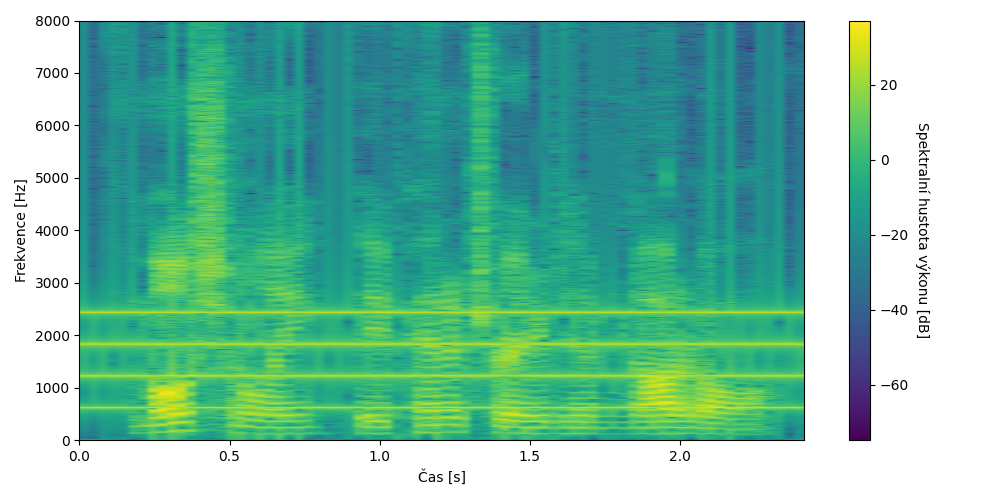

In [14]:
### TASK 4.4

# count DFT of matrix of frames
dftSpectrum = np.fft.fft(matrixOfFrames.transpose())
# adjustment of the DFT coefficients
dftSpectrum = 10*np.log10(np.abs(dftSpectrum)**2)
# display spectogram 
plt.figure(figsize=(10,5))
plt.imshow(dftSpectrum.T[:512],
           aspect="auto",
           extent=[0, durationOfInputSignal, 0, frequency/2],
           origin="lower")
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()

In [15]:
### TASK 4.5

# Determination of interference frequencies
x = np.arange(0, frequency/2, frequency/2/512)
y = np.abs(theBestFrameDFT[0:512])
firstFrequency = float(x[np.where(y == max(y[:int(np.where(x==1000)[0])]))])
secondFrequency = float(x[np.where(y == max(y[int(np.where(x==1000)[0]):int(np.where(x==1500)[0])]))])
thirdFrequency = float(x[np.where(y == max(y[int(np.where(x==1500)[0]):int(np.where(x==2000)[0])]))])
fourthFrequency = float(x[np.where(y == max(y[int(np.where(x==2000)[0]):int(np.where(x==3000)[0])]))])
print("First frequence  :\t" + str(firstFrequency))
print("Second frequence :\t" + str(secondFrequency))
print("Third frequence  :\t" + str(thirdFrequency))
print("Fourth frequence :\t" + str(fourthFrequency))

First frequence  :	609.375
Second frequence :	1218.75
Third frequence  :	1812.5
Fourth frequence :	2421.875


In [ ]:
### TASK 4.6

# signal generation
time = np.arange(numberOfSamples)
cos1 = np.cos(firstFrequency/frequency*2*np.pi * time)
cos2 = np.cos(secondFrequency/frequency*2*np.pi * time)
cos3 = np.cos(thirdFrequency/frequency*2*np.pi * time)
cos4 = np.cos(fourthFrequency/frequency*2*np.pi * time)
finalCos = cos1 + cos2 + cos3 + cos4
# signal averaging
finalCos -= np.mean(finalCos)
# signal normalizationabs
finalCos /= np.abs(finalCos).max()
IPython.display.display(IPython.display.Audio(finalCos, rate=frequency)) 
#sf.write('4cos.wav', finalCos, frequency)

<IPython.core.display.Javascript object>


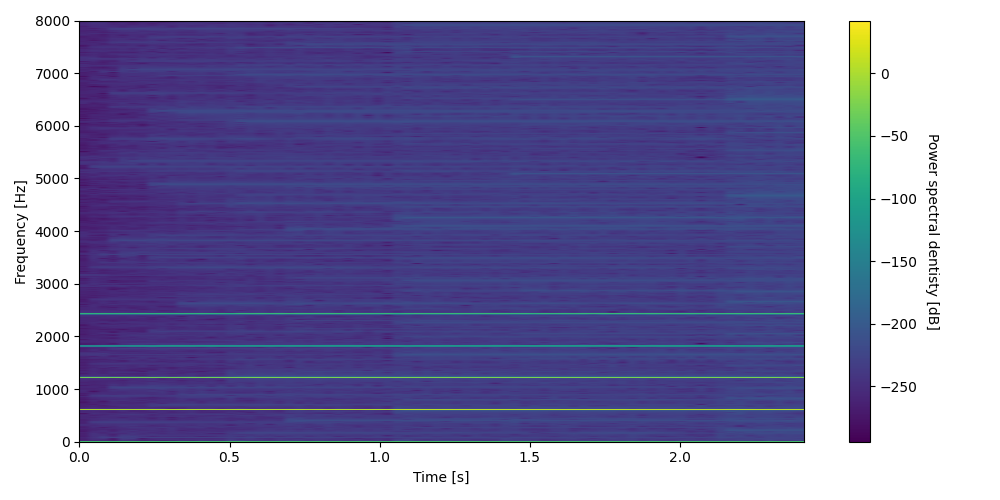

In [12]:
# signal distribution on the frames
fromMarker = 0
toMarker = 1024
cosMatrixOfFrames = np.zeros(shape=(1024,numberOfSamples//512-1 if numberOfSamples//512%2 == 1 else numberOfSamples//512))
counter = 0
while(toMarker < numberOfSamples):
    counter2 = 0
    for i in range(fromMarker, toMarker):
        cosMatrixOfFrames[counter2][counter] = finalCos[i]
        counter2+=1
    fromMarker += 512
    toMarker += 512
    counter+=1
    
# count DFT of matrix of frames
dftSpectrum = np.fft.fft(cosMatrixOfFrames.transpose())
# adjustment of the DFT coefficients
dftSpectrum = 10*np.log10(np.abs(dftSpectrum)**2)
# display spectogram 
plt.figure(figsize=(10,5))
plt.imshow(dftSpectrum.T[:512],
           aspect="auto",
           extent=[0, durationOfInputSignal, 0, frequency/2],
           origin="lower")
plt.gca().set_xlabel('Time [s]')
plt.gca().set_ylabel('Frequency [Hz]')
cbar = plt.colorbar()
cbar.set_label('Power spectral dentisty [dB]', rotation=270, labelpad=15)

plt.tight_layout()

First band-stop filter
b:[   0.97489216   -9.47140744   41.68163275 -109.40445704  189.65339944
 -226.86811919  189.65339944 -109.40445704   41.68163275   -9.47140744
    0.97489216]
a:[   1.           -9.6659302    42.32146848 -110.51955144  190.6136907
 -226.85982021  188.68470746 -108.29398696   41.04956734   -9.28055933
    0.95041473]



<IPython.core.display.Javascript object>


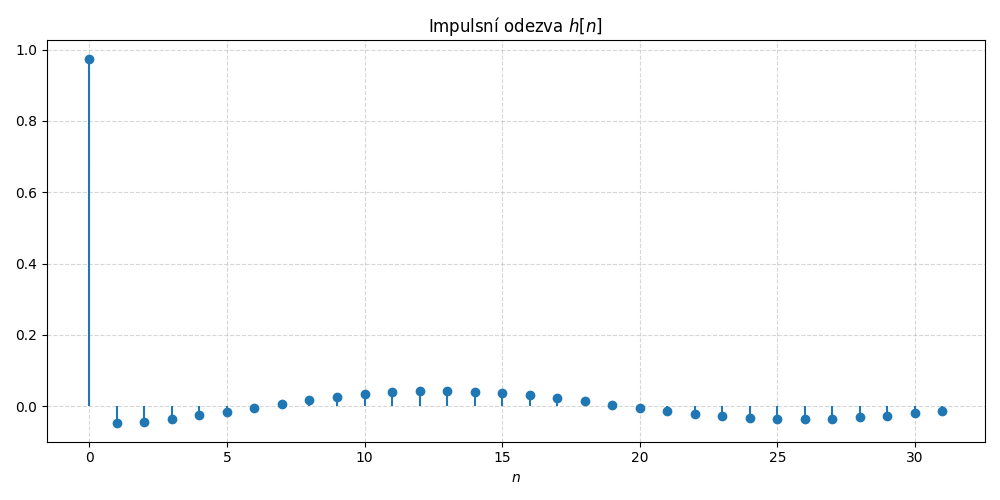

Second band-stop filter
b:[   0.97489216   -8.65379602   35.60121735  -89.16543952  150.35165273
 -178.21649542  150.35165273  -89.16543952   35.60121735   -8.65379602
    0.97489216]
a:[   1.           -8.83152676   36.14769186  -90.07412691  151.11266059
 -178.20961085  149.58342367  -88.26027925   35.06133366   -8.47942271
    0.95041473]



<IPython.core.display.Javascript object>


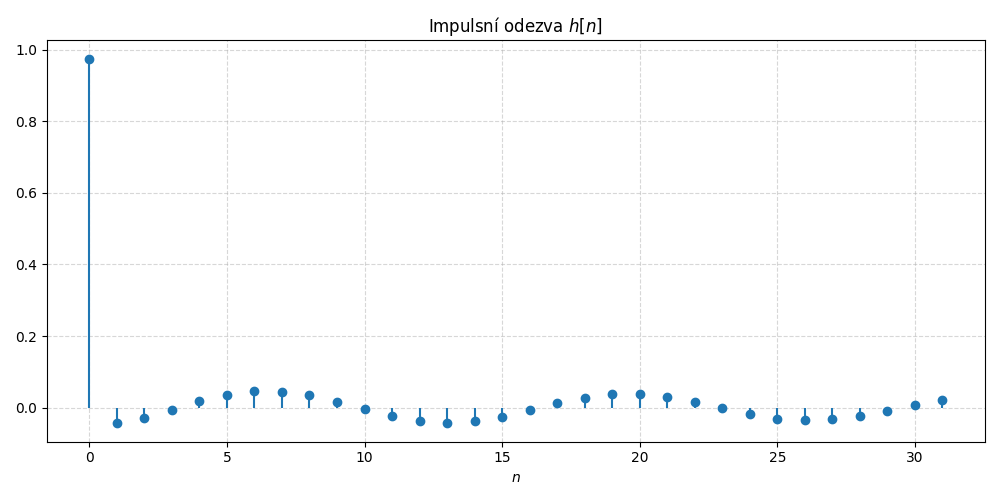

Third band-stop filter
b:[   0.97489216   -7.3821974    27.23461118  -63.39244135  102.47202027
 -119.78746329  102.47202027  -63.39244135   27.23461118   -7.3821974
    0.97489216]
a:[   1.           -7.53381219   27.65262135  -64.03831388  102.99034345
 -119.78240966  101.94809886  -62.74875835   26.82156884   -7.23344671
    0.95041473]



<IPython.core.display.Javascript object>


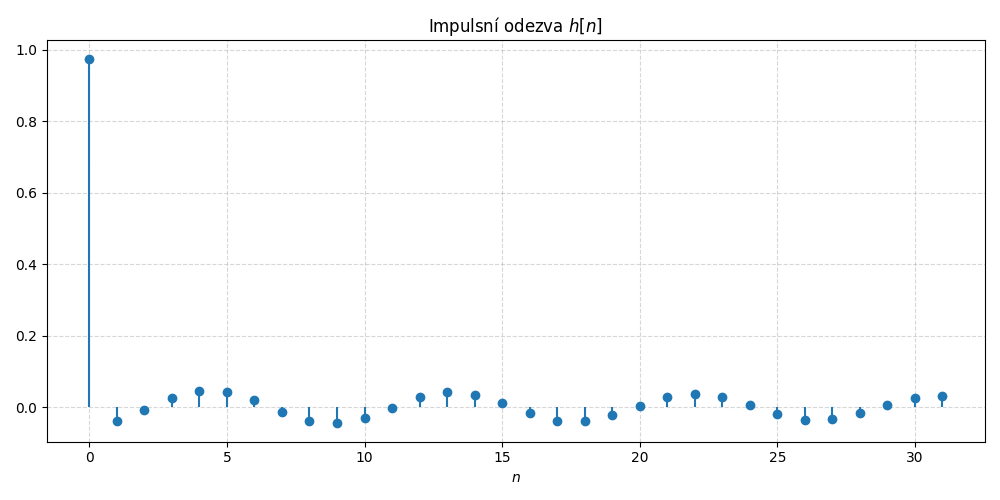

Fourth band-stop filter
b:[  0.97489216  -5.66248441  18.03026652 -37.93256017  58.09297299
 -66.60248434  58.09297299 -37.93256017  18.03026652  -5.66248441
   0.97489216]
a:[  1.          -5.77877992  18.30694937 -38.31887168  58.3864964
 -66.59929936  57.79563685 -37.54723675  17.75676601  -5.5483858
   0.95041473]


<IPython.core.display.Javascript object>


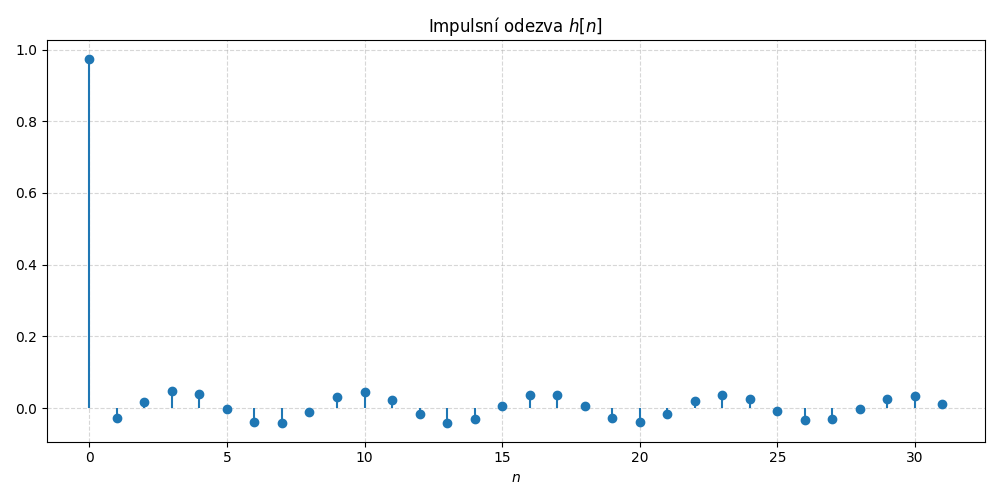

In [13]:
### TASK 4.7

# Filter - 4 band-stop filters
gpass = 3 
gstop = 50
# not the final parameters will be used as frequency_k -/+ wp/ws
wp = 20
ws = 70

N_imp = 32
imp = [1, *np.zeros(N_imp-1)] # impuls

# first band-stop filter
n1, wn1 = signal.buttord([(firstFrequency-wp)/frequency*2,(firstFrequency+wp)/frequency*2], [(firstFrequency-ws)/frequency*2,(firstFrequency+ws)/frequency*2], gpass, gstop)
b1,a1 = signal.butter(n1, wn1, 'bandstop')
print("First band-stop filter")
print("b:"+ str(b1))
print("a:"+ str(a1))
print()

# impulse response
h1 = lfilter(b1, a1, imp)
# display impilse response
plt.figure(figsize=(10,5))
plt.stem(np.arange(N_imp), h1, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva $h[n]$')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

# second band-stop filter
n2, wn2 = signal.buttord([(secondFrequency-wp)/frequency*2,(secondFrequency+wp)/frequency*2], [(secondFrequency-ws)/frequency*2,(secondFrequency+ws)/frequency*2], gpass, gstop)
b2,a2 = signal.butter(n2, wn2, 'bandstop')
print("Second band-stop filter")
print("b:"+ str(b2))
print("a:"+ str(a2))
print()

# impulse response
h2 = lfilter(b2, a2, imp)
# display impilse response
plt.figure(figsize=(10,5))
plt.stem(np.arange(N_imp), h2, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva $h[n]$')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

# third band-stop filter
n3, wn3 = signal.buttord([(thirdFrequency-wp)/frequency*2,(thirdFrequency+wp)/frequency*2], [(thirdFrequency-ws)/frequency*2,(thirdFrequency+ws)/frequency*2], gpass, gstop)
b3,a3 = signal.butter(n3, wn3, 'bandstop')
print("Third band-stop filter")
print("b:"+ str(b3))
print("a:"+ str(a3))
print()

# impulse response
h3 = lfilter(b3, a3, imp)
# display impilse response
plt.figure(figsize=(10,5))
plt.stem(np.arange(N_imp), h3, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva $h[n]$')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

# fourth band-stop filter
n4, wn4 = signal.buttord([(fourthFrequency-wp)/frequency*2,(fourthFrequency+wp)/frequency*2], [(fourthFrequency-ws)/frequency*2,(fourthFrequency+ws)/frequency*2], gpass, gstop)
b4,a4 = signal.butter(n4, wn4, 'bandstop')
print("Fourth band-stop filter")
print("b:"+ str(b4))
print("a:"+ str(a4))

# impulse response
h4 = lfilter(b4, a4, imp)
# display impilse response
plt.figure(figsize=(10,5))
plt.stem(np.arange(N_imp), h4, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva $h[n]$')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()

In [14]:
### TASK 4.8 

# zeros and poles
def zplane(b,a):
    plt.figure(figsize=(4,3.5))
    ang = np.linspace(0, 2*np.pi,100)
    plt.plot(np.cos(ang), np.sin(ang))
    kn = 1
    kd = 1
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    z = np.roots(b)
    p = np.roots(a)
    k = kn/float(kd)
    print("Zeros: " + str(z))
    print("Poles: " + str(p))
    # nuly, poly
    plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='nuly')
    plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='póly')
    plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
    plt.gca().set_ylabel('Imaginarní složka $\mathbb{I}\{$z$\}$')
    plt.grid(alpha=0.5, linestyle='--')
    plt.legend(loc='upper left')
    plt.tight_layout()
    

<IPython.core.display.Javascript object>


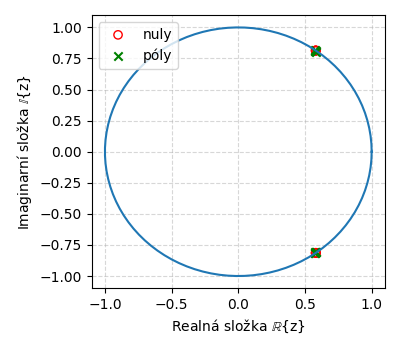

Zeros: [0.5800088 +0.81523855j 0.5800088 -0.81523855j 0.58173397+0.81518193j
 0.58173397-0.81518193j 0.58221168+0.81352291j 0.58221168-0.81352291j
 0.57942264+0.81361686j 0.57942264-0.81361686j 0.58078227+0.81255748j
 0.58078227-0.81255748j]
Poles: [0.57331626+0.81635697j 0.57331626-0.81635697j 0.58546879+0.80771694j
 0.58546879-0.80771694j 0.57340184+0.81149973j 0.57340184-0.81149973j
 0.58089731+0.80620482j 0.58089731-0.80620482j 0.57630577+0.80763991j
 0.57630577-0.80763991j]


In [15]:
#zplane(b1,a1)
#zplane(b2,a2)
#zplane(b3,a3)
zplane(b4,a4)

<IPython.core.display.Javascript object>


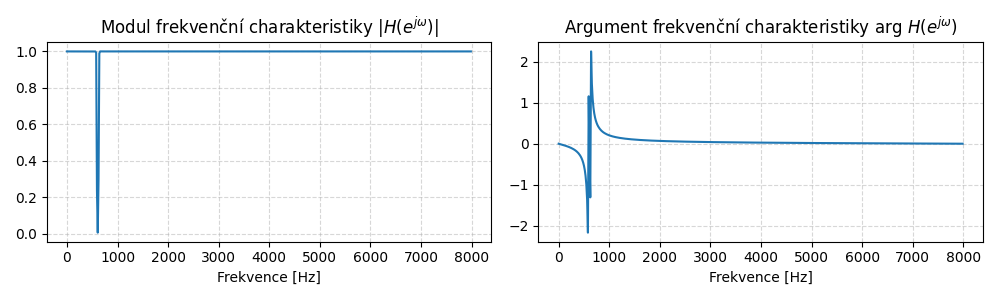

<IPython.core.display.Javascript object>


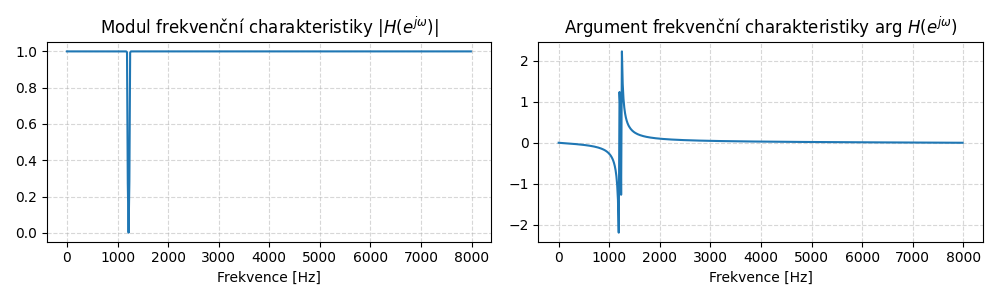

<IPython.core.display.Javascript object>


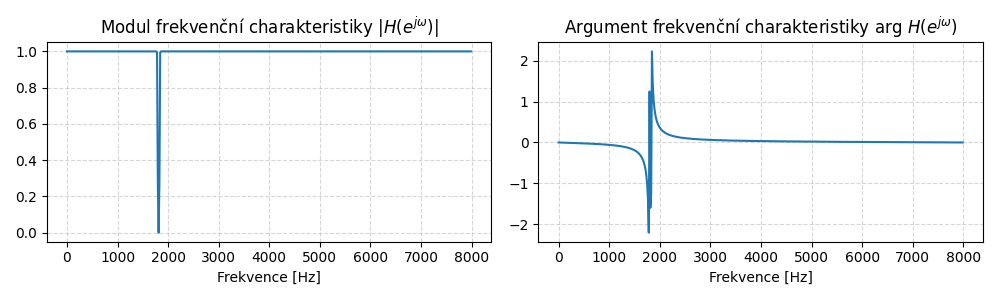

<IPython.core.display.Javascript object>


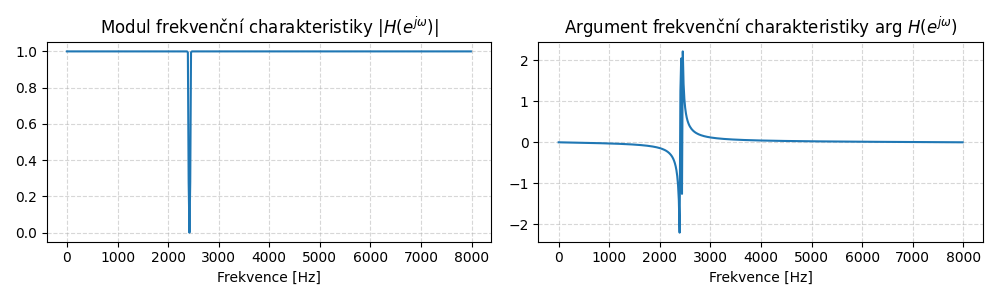

In [16]:
### TASK 4.9

#frequency characteristics
w1, H1 = freqz(b1, a1)
w2, H2 = freqz(b2, a2)
w3, H3 = freqz(b3, a3)
w4, H4 = freqz(b4, a4)

def frequencyCharacteristic(w, H):
    _, ax = plt.subplots(1, 2, figsize=(10,3))

    ax[0].plot(w / 2 / np.pi * frequency, np.abs(H))
    ax[0].set_xlabel('Frekvence [Hz]')
    ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')

    ax[1].plot(w / 2 / np.pi * frequency, np.angle(H))
    ax[1].set_xlabel('Frekvence [Hz]')
    ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')

    for ax1 in ax:
        ax1.grid(alpha=0.5, linestyle='--')

    plt.tight_layout()
    
frequencyCharacteristic(w1, H1)
frequencyCharacteristic(w2, H2)
frequencyCharacteristic(w3, H3)
frequencyCharacteristic(w4, H4)

In [17]:
### TASK 4.10

# filtration
signalOut = lfilter(b1, a1, basicSignal)
signalOut = lfilter(b2, a2, signalOut)
signalOut = lfilter(b3, a3, signalOut)
signalOut = lfilter(b4, a4, signalOut)

# signal averaging
signalOut -= np.mean(signalOut)
# signal normalizationabs
signalOut /= np.abs(signalOut).max()

IPython.display.display(IPython.display.Audio(signalOut, rate=frequency))
sf.write('clean_bandstop2.wav', signalOut, frequency)

<IPython.core.display.Javascript object>


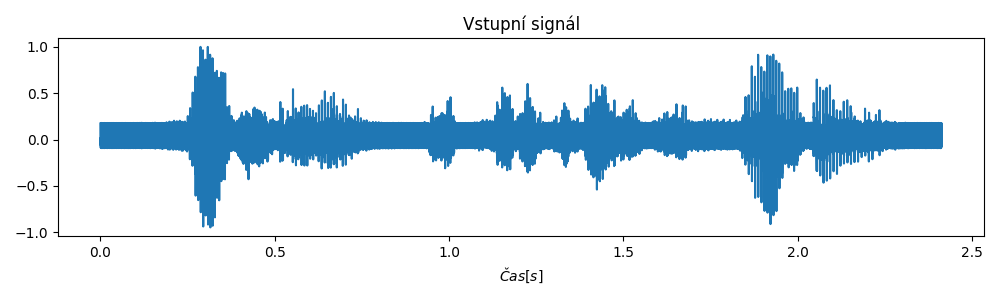

In [18]:
time = np.arange(numberOfSamples)/frequency
# display input signal
plt.figure(figsize=(10,3))
plt.plot(time, basicSignal)
plt.gca().set_xlabel('$Čas[s]$')
plt.gca().set_title('Vstupní signál')
plt.tight_layout()

<IPython.core.display.Javascript object>


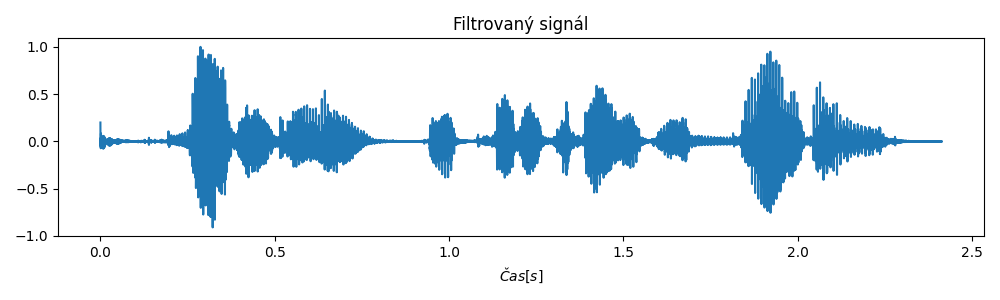

In [19]:
# display input signal
plt.figure(figsize=(10,3))
plt.plot(time, signalOut)
plt.gca().set_xlabel('$Čas[s]$')
plt.gca().set_title('Filtrovaný signál')
plt.tight_layout()